In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
heartdf = pd.read_csv('heart_2020_cleaned.csv')

In [155]:
heartdf.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [156]:
heartdf.shape

(319795, 18)

In [157]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [158]:
heartdf.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [159]:
heartdf.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


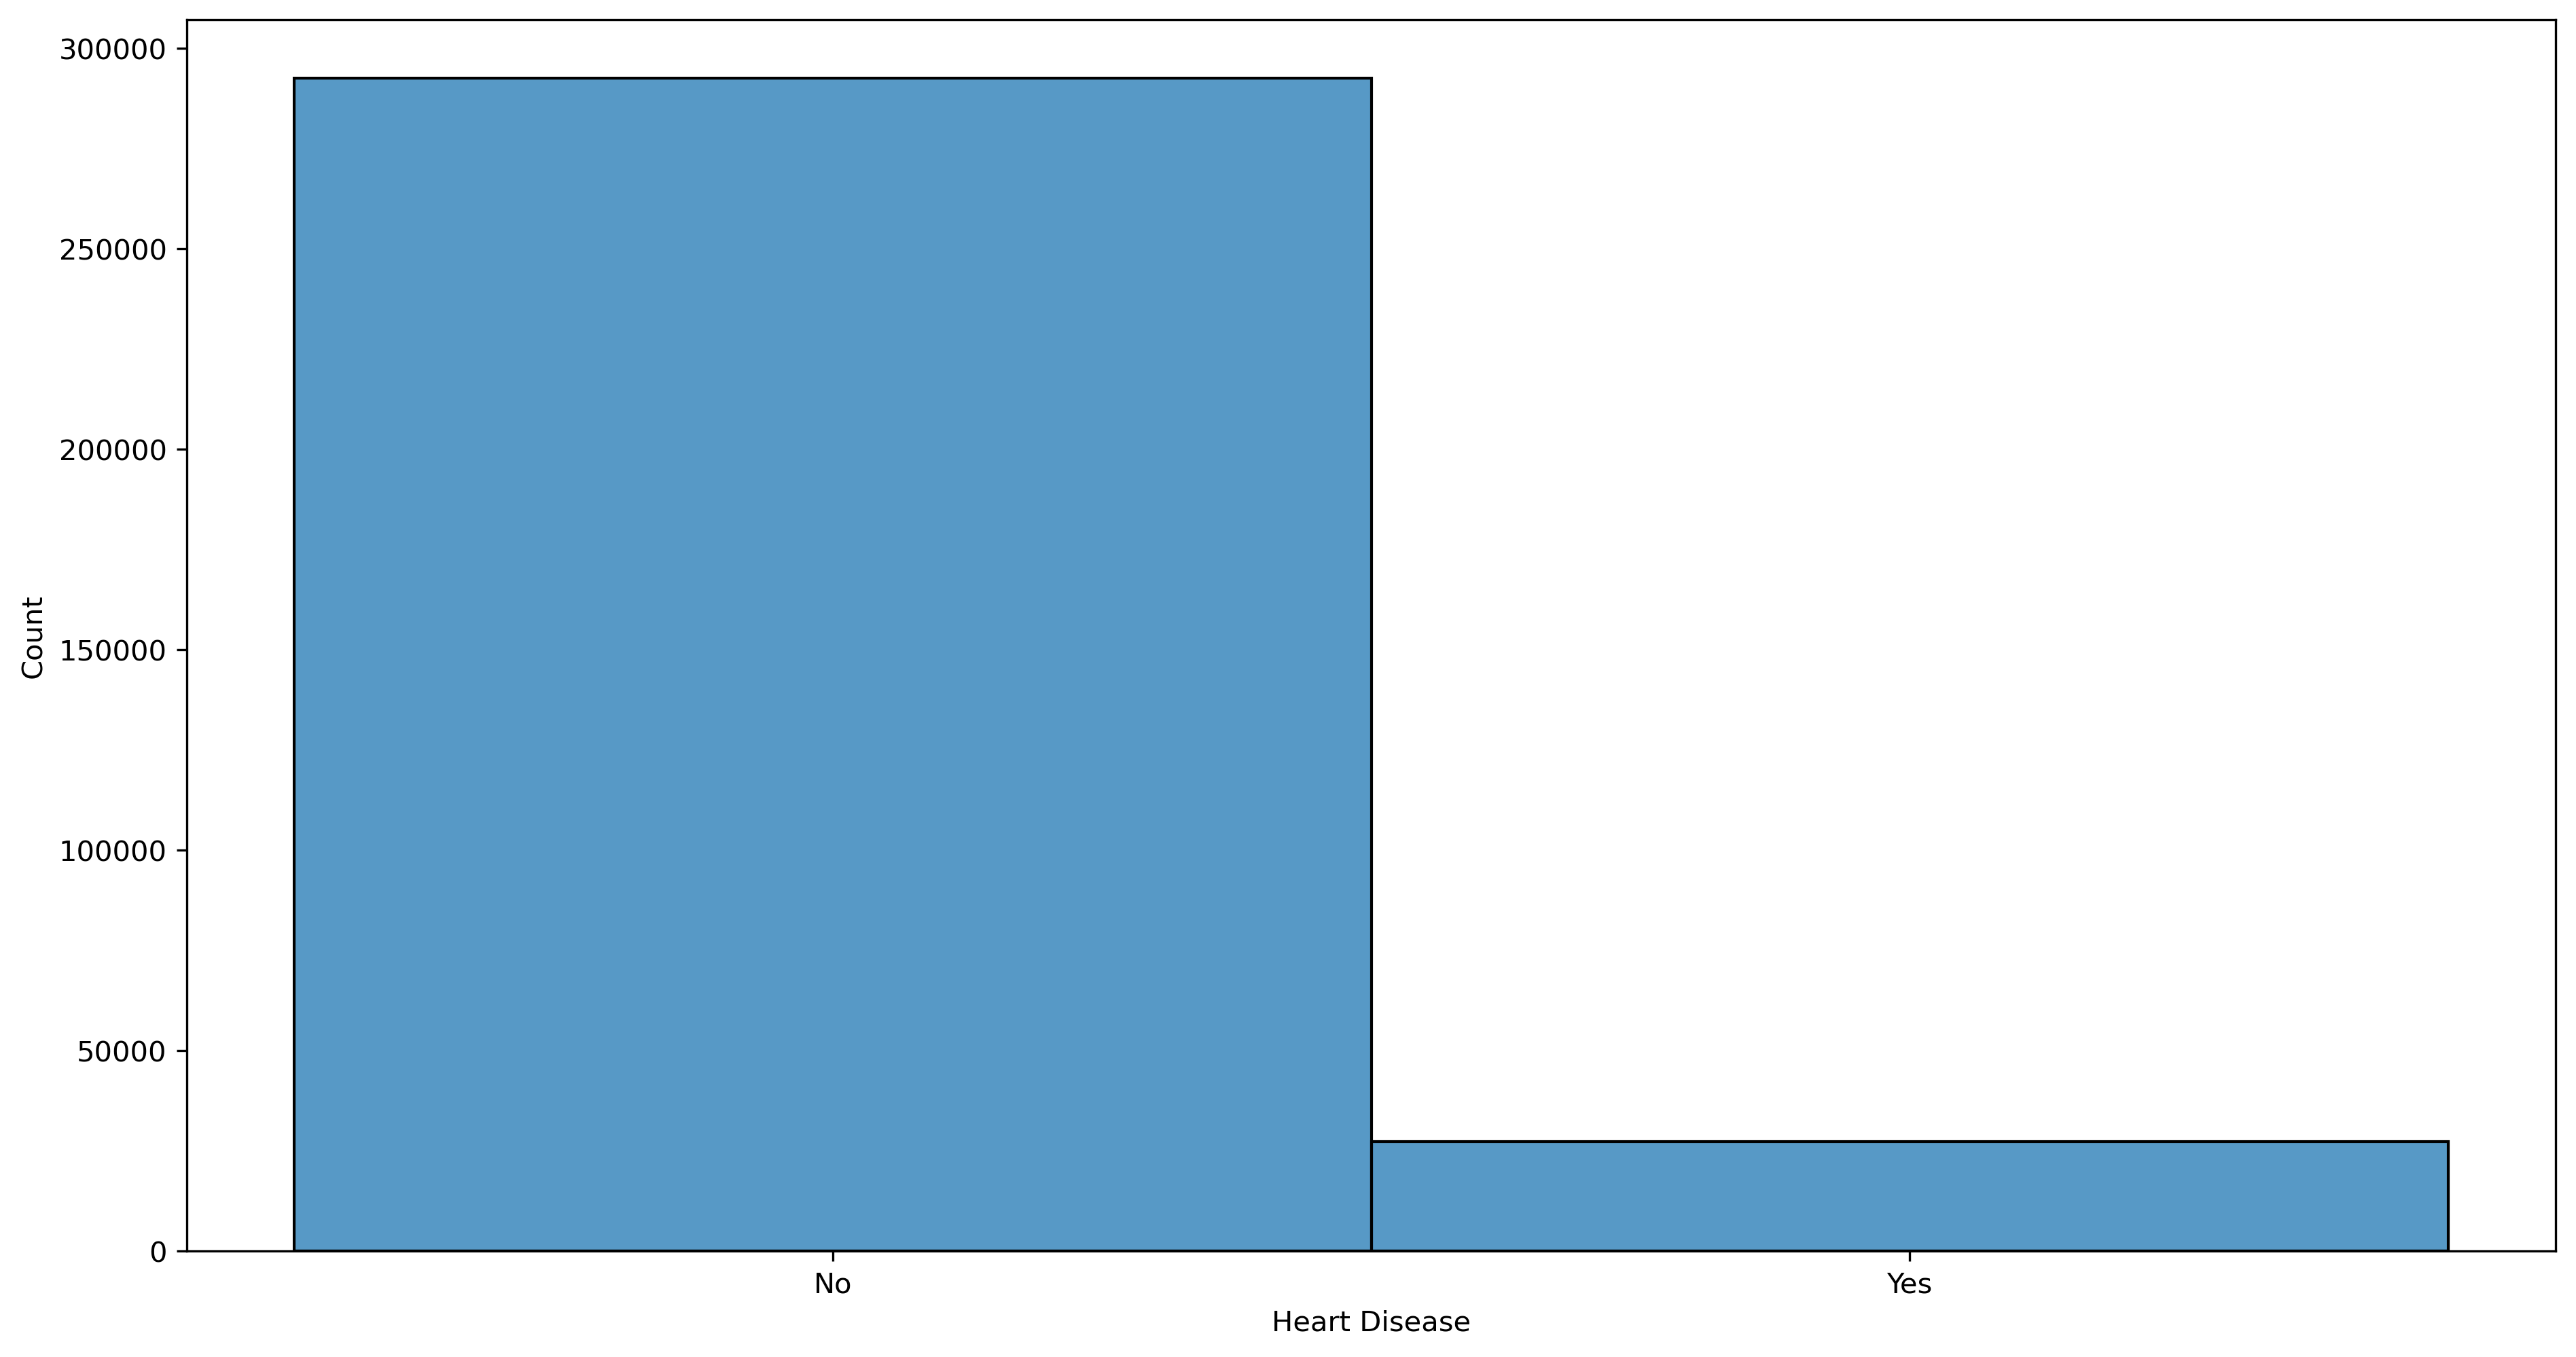

In [160]:
plt.figure(figsize = (15,8),dpi = 300)
sns.histplot(data = heartdf,x = 'HeartDisease')
plt.xlabel('Heart Disease');

<AxesSubplot:ylabel='HeartDisease'>

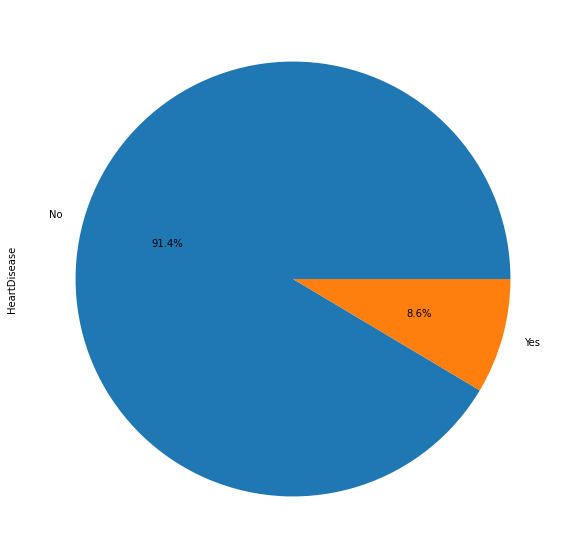

In [161]:
heartdf['HeartDisease'].value_counts().plot(kind = 'pie',figsize = (20,10),autopct='%1.1f%%')


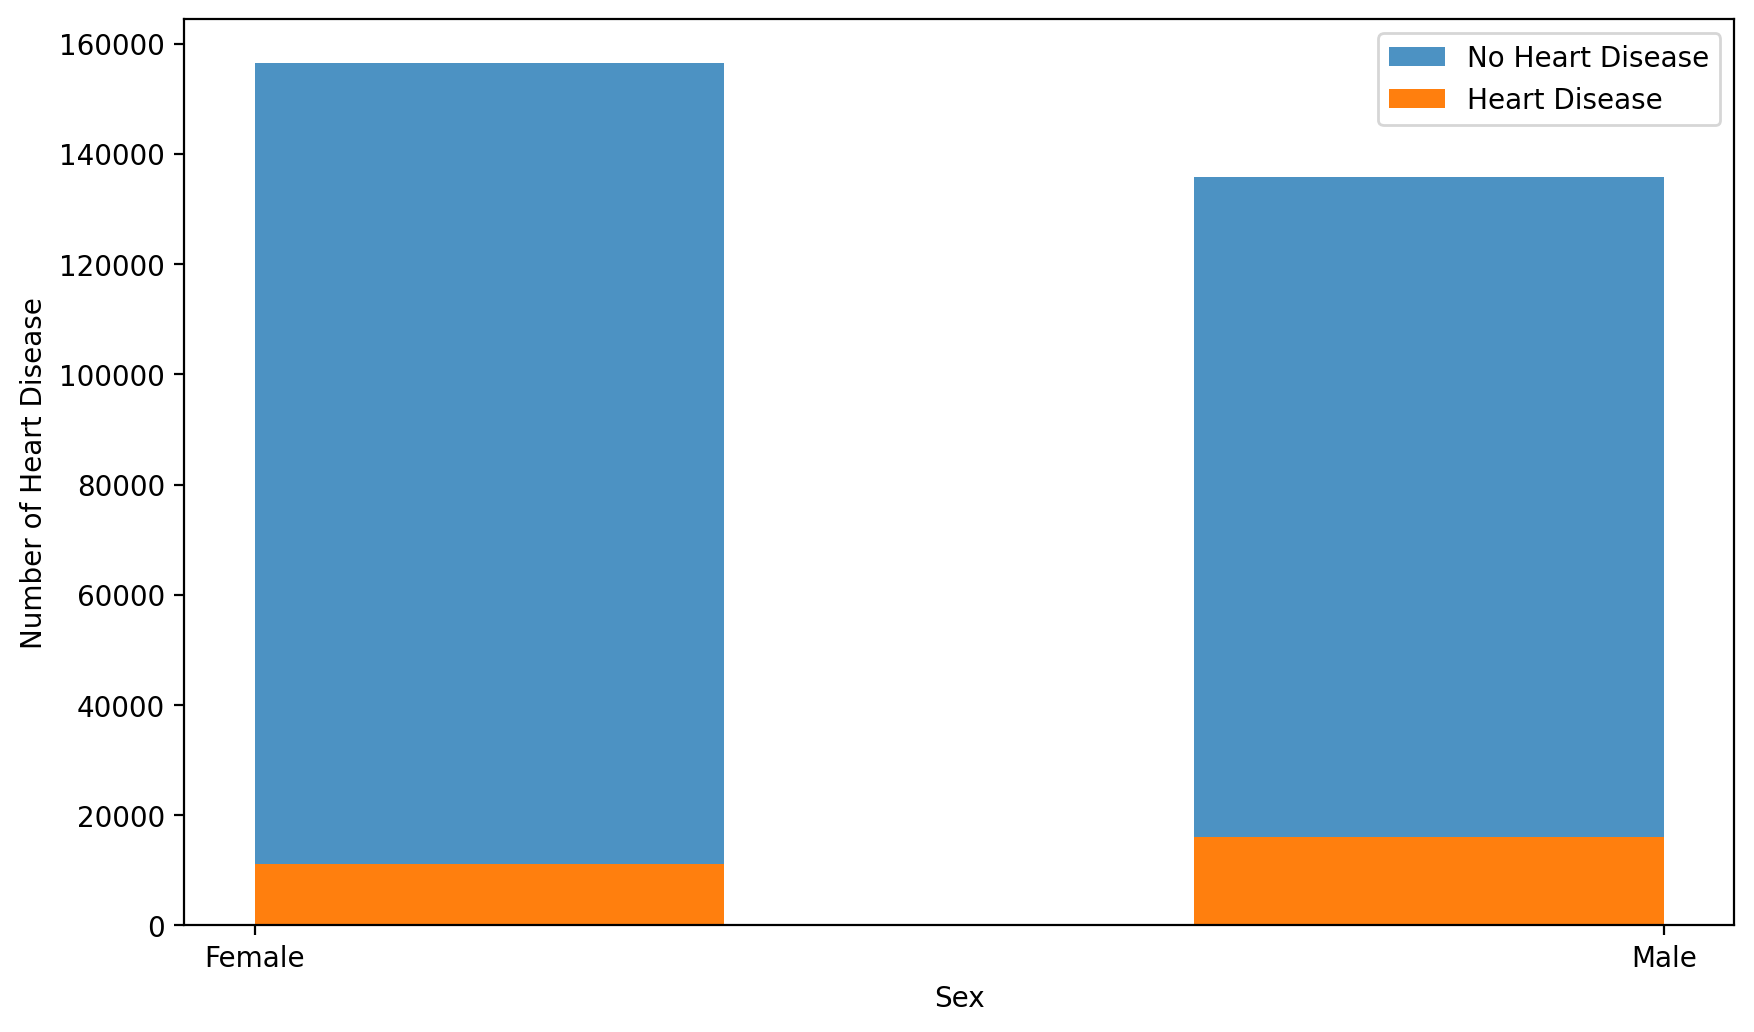

In [162]:
plt.figure(figsize=(10,6),dpi = 200)
plt.hist(heartdf[heartdf['HeartDisease']=='No']['Sex'],label = 'No Heart Disease',bins = 3,alpha =0.8)
plt.hist(heartdf[heartdf['HeartDisease']=='Yes']['Sex'],label = 'Heart Disease',bins = 3,alpha =1 )
plt.xlabel('Sex')
plt.ylabel('Number of Heart Disease')
plt.legend(loc = 'best');

In [163]:
female_with_heartdisease = len(heartdf[(heartdf['HeartDisease']=='Yes') & (heartdf['Sex']=='Female')])
num_female = len(heartdf[heartdf['Sex']=='Female'])
male_with_heartdisease = len(heartdf[(heartdf['HeartDisease']=='Yes')& (heartdf['Sex']=='Male')])
num_male = len(heartdf[heartdf['Sex']=='Male'])
print('Probability of Male to have Heart Disease:',male_with_heartdisease/num_male)
print('Probability to Female to have Heart Disease:',female_with_heartdisease/num_female)

Probability of Male to have Heart Disease: 0.10618461740904007
Probability to Female to have Heart Disease: 0.06694675367241738


#### Most heart disease patients  are Males than Females

<AxesSubplot:xlabel='HeartDisease', ylabel='PhysicalHealth'>

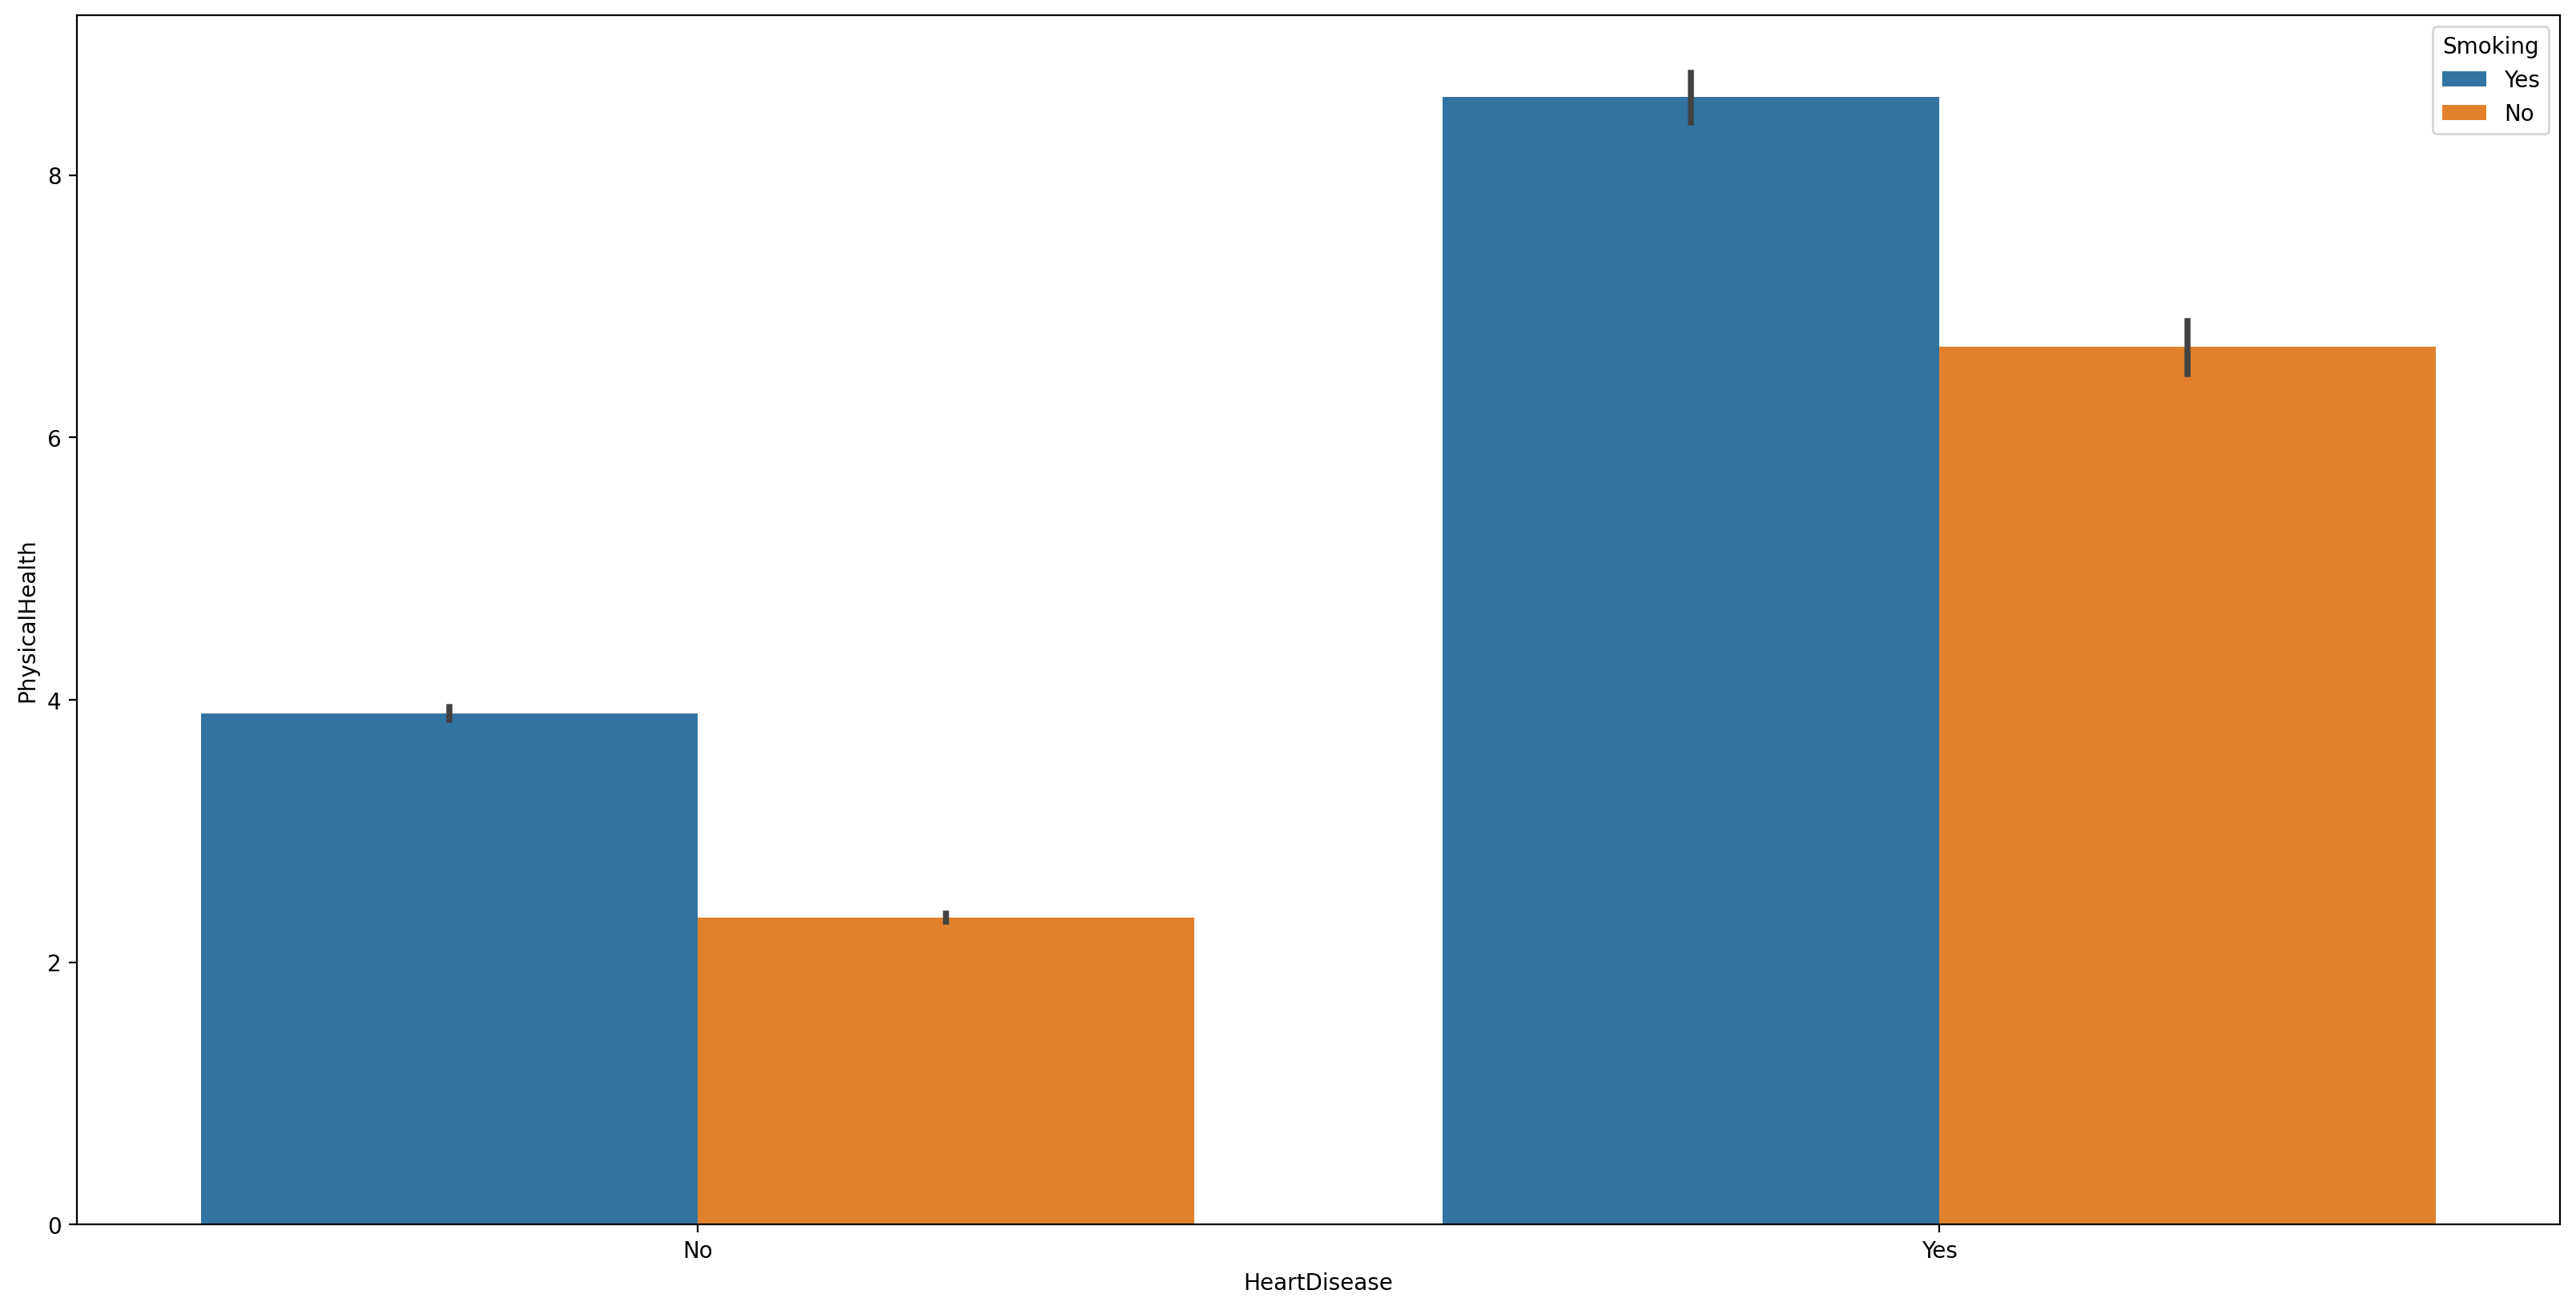

In [164]:
plt.figure(figsize = (20,10),dpi =200)
sns.barplot(data = heartdf,x = 'HeartDisease',y = 'PhysicalHealth',hue = 'Smoking')

<AxesSubplot:xlabel='Race', ylabel='count'>

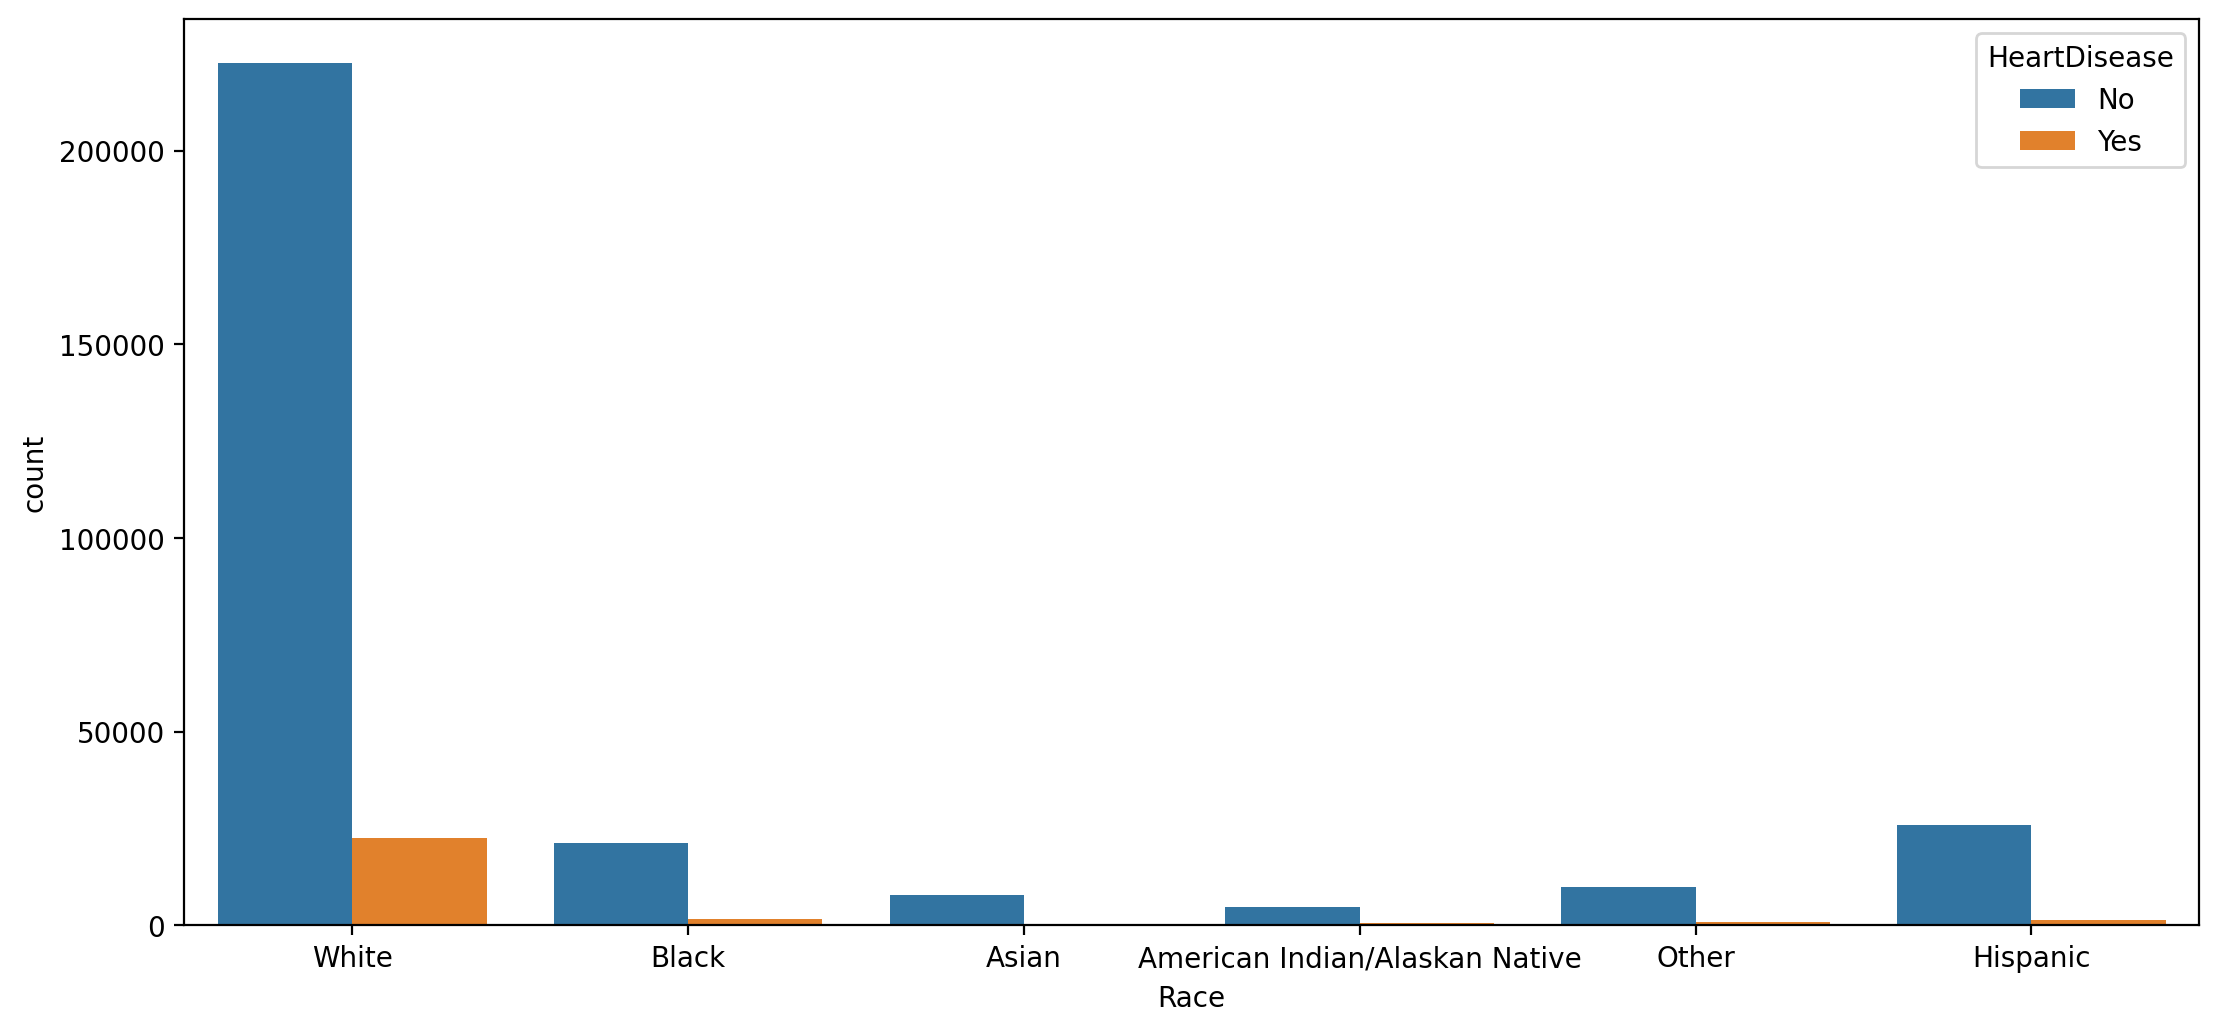

In [165]:
plt.figure(figsize = (13,6),dpi = 200)
sns.countplot(x=heartdf['Race'],hue = 'HeartDisease',data = heartdf )

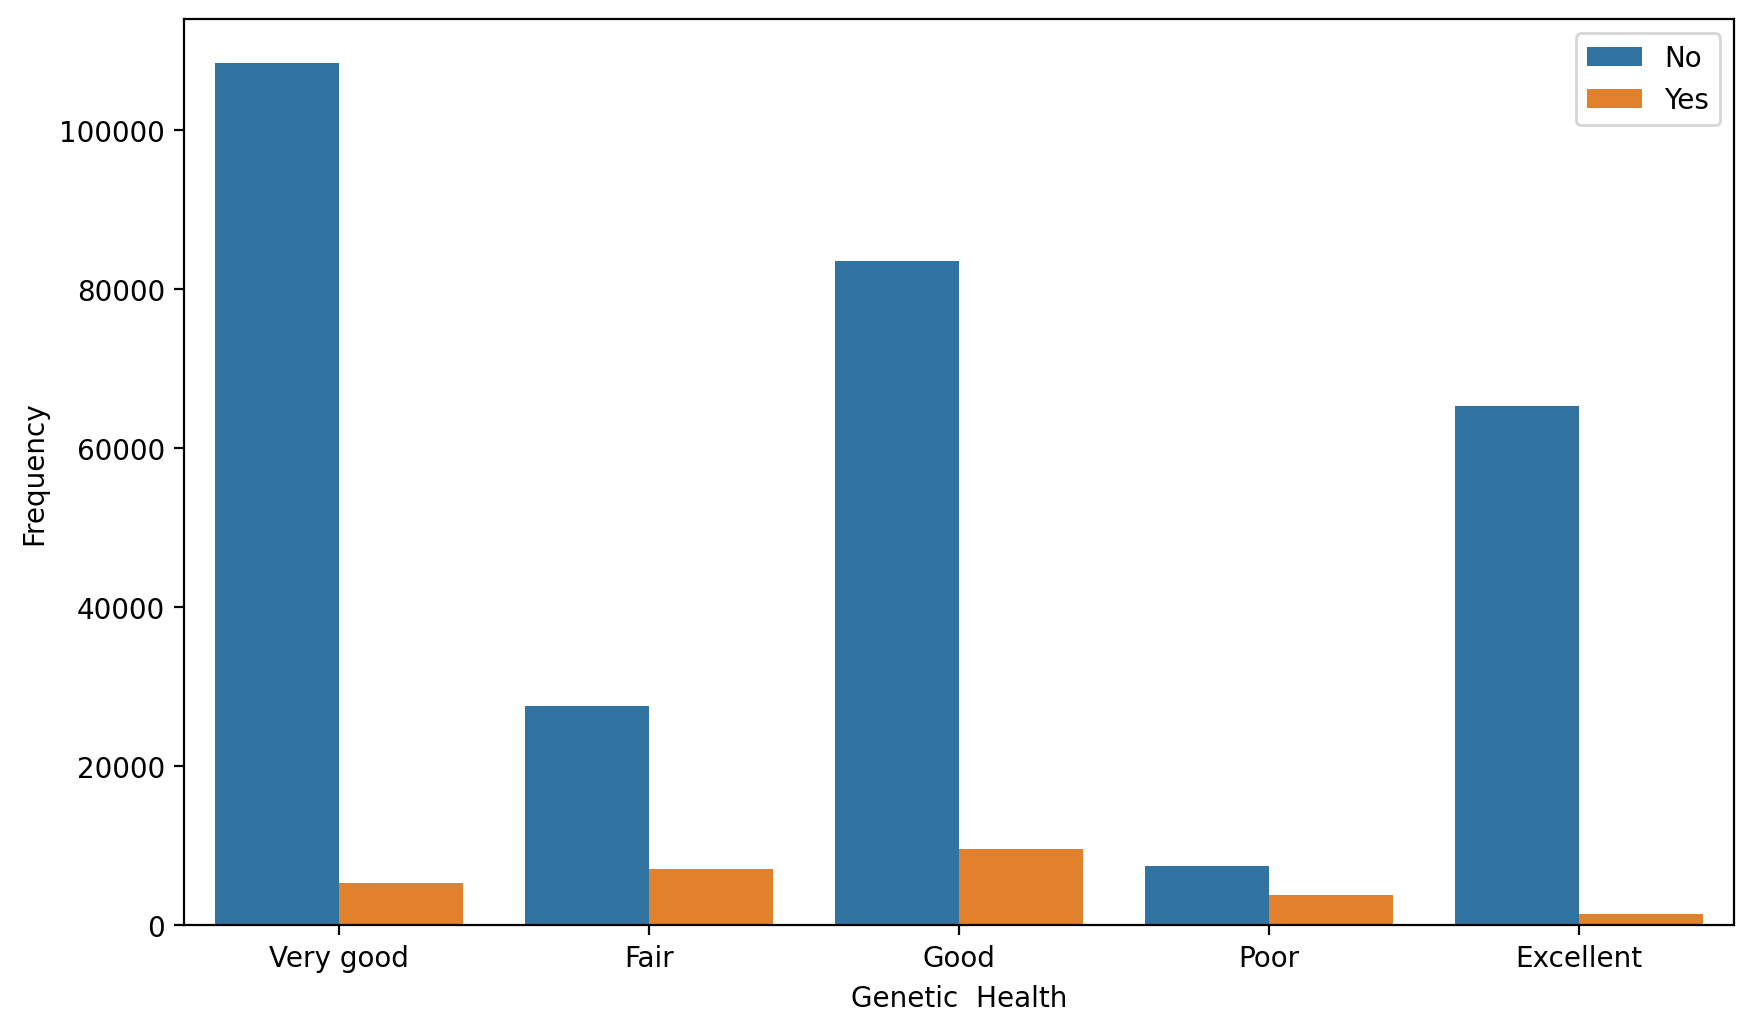

In [166]:
plt.figure(figsize = (10,6),dpi = 200)
sns.countplot(x = heartdf['GenHealth'],hue = 'HeartDisease',data = heartdf)
plt.xlabel('Genetic  Health')
plt.ylabel('Frequency')
plt.legend(loc= 'best');

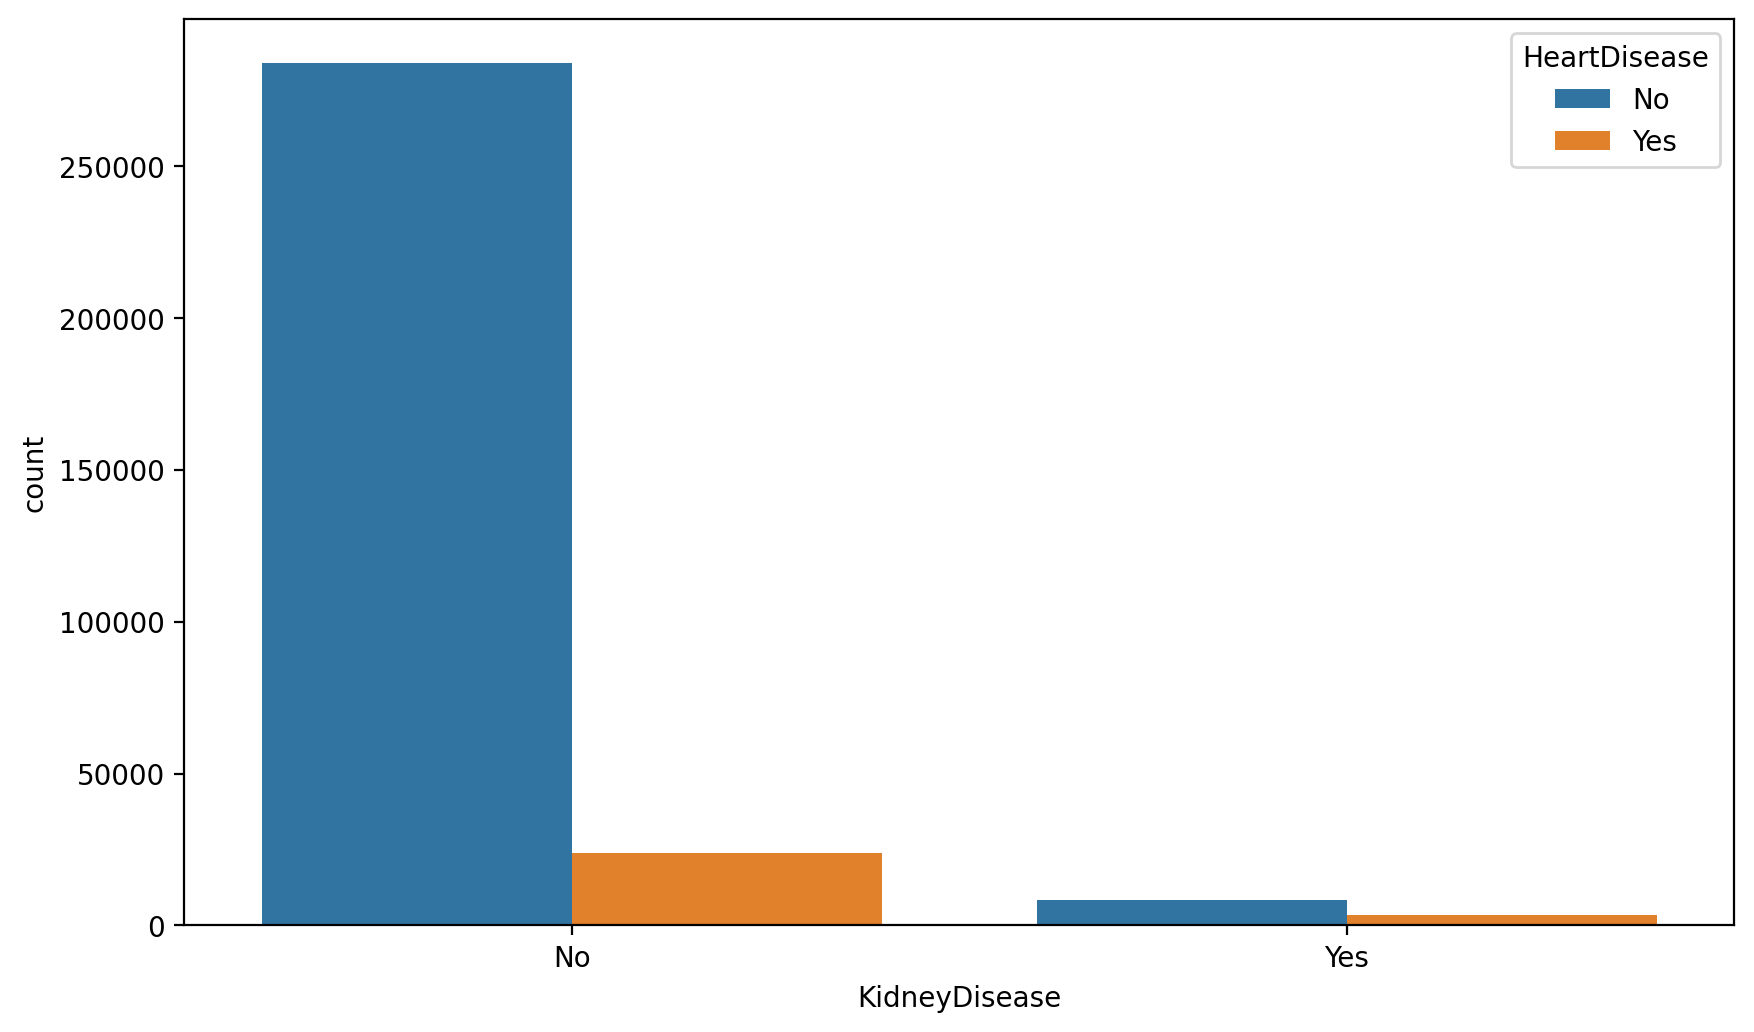

In [167]:
plt.figure(figsize =(10,6),dpi = 200)
sns.countplot(x = heartdf['KidneyDisease'],hue = 'HeartDisease',data = heartdf);

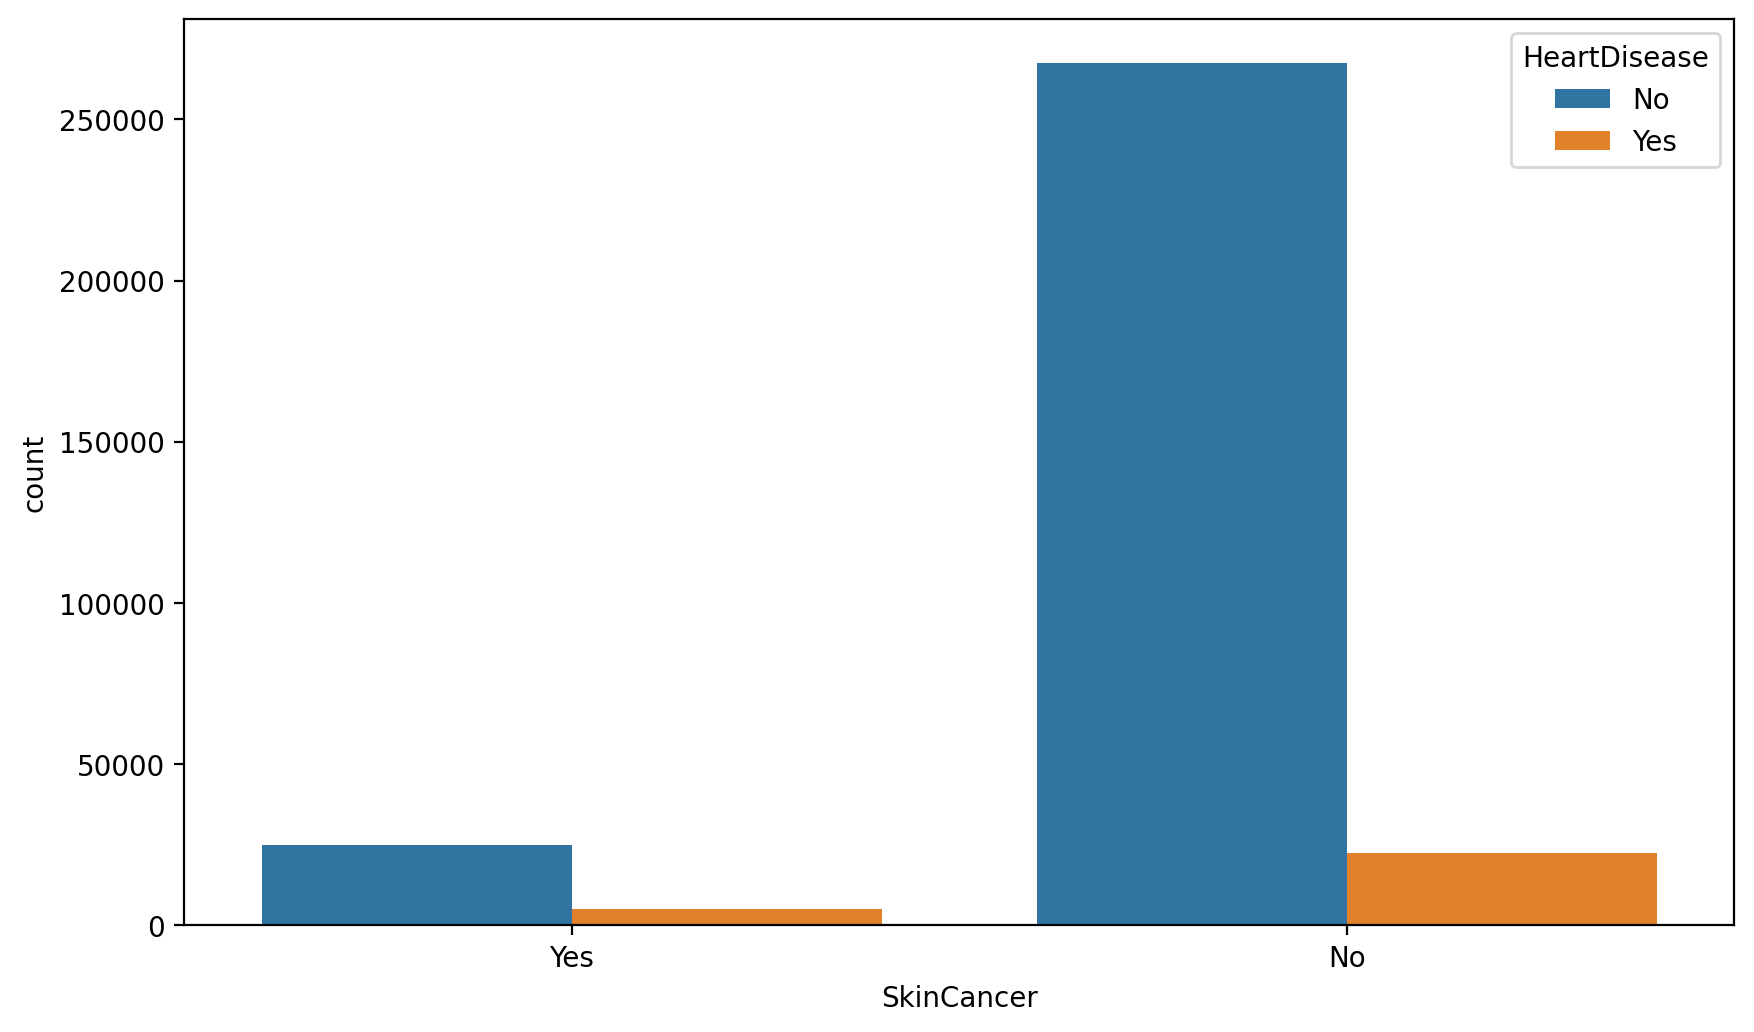

In [168]:
plt.figure(figsize = (10,6),dpi = 200)
sns.countplot(x = heartdf['SkinCancer'],hue = 'HeartDisease',data = heartdf);

In [169]:
obj = heartdf.select_dtypes(include = object).columns
obj


Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

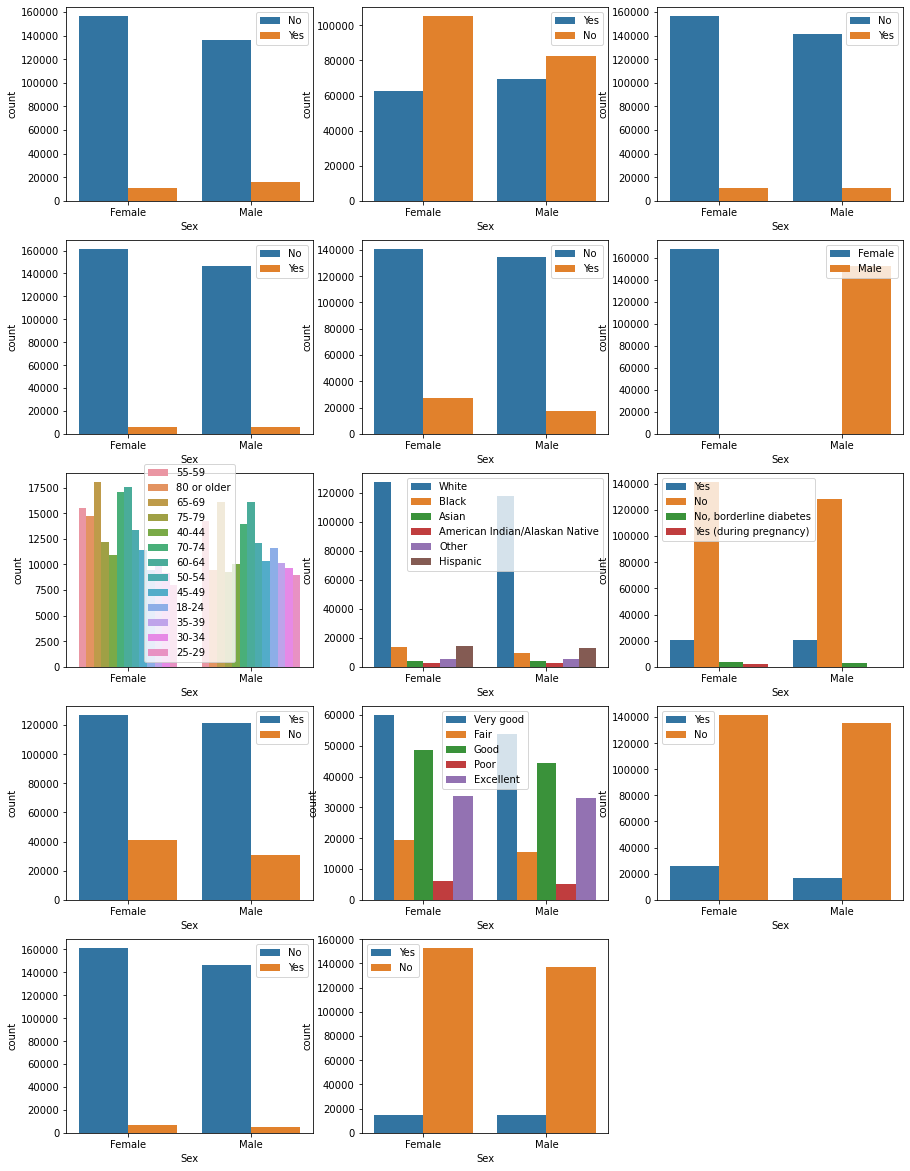

In [170]:
i = 1
plt.figure(figsize = (15,25))
for col in obj:
    plt.subplot(6,3,i)
    sns.countplot(x = 'Sex',hue = heartdf[col],data = heartdf)
    plt.legend(loc = 'best')
    i+=1

In [171]:
heartdf.select_dtypes(include = 'float').describe().T[['min','mean','max']]

,min,mean,max
BMI,12.02,28.325399,94.85
PhysicalHealth,0.00,3.371710,30.00
MentalHealth,0.00,3.898366,30.00
SleepTime,1.00,7.097075,24.00


### Modelling

In [194]:
from sklearn.preprocessing import LabelEncoder

In [195]:
lb = LabelEncoder()

In [198]:
heartdf['HeartDisease'] = lb.fit_transform(heartdf['HeartDisease'])
heartdf['Smoking'] = lb.fit_transform(heartdf['Smoking'])
heartdf['AlcoholDrinking'] = lb.fit_transform(heartdf['AlcoholDrinking'])
heartdf['Stroke'] = lb.fit_transform(heartdf['Stroke'])
heartdf['DiffWalking']= lb.fit_transform(heartdf['DiffWalking'])
heartdf['Sex']= lb.fit_transform(heartdf['Sex'])
heartdf['AgeCategory']= lb.fit_transform(heartdf['AgeCategory'])
heartdf['Race']= lb.fit_transform(heartdf['Race'])
heartdf['Diabetic']= lb.fit_transform(heartdf['Diabetic'])
heartdf['PhysicalActivity']= lb.fit_transform(heartdf['PhysicalActivity'])
heartdf['GenHealth']= lb.fit_transform(heartdf['GenHealth'])
heartdf['Asthma']= lb.fit_transform(heartdf['Asthma'])
heartdf['KidneyDisease']= lb.fit_transform(heartdf['KidneyDisease'])
heartdf['SkinCancer']= lb.fit_transform(heartdf['SkinCancer'])

In [199]:
X = heartdf.iloc[:,1:]

In [200]:
y = heartdf['HeartDisease']

In [202]:
from sklearn.model_selection import train_test_split


In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,shuffle = True)

## Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))

Accuracy: 0.9142575712565862
Mean Absolute Error: 0.08574242874341374


/Users/sanan33/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
